<a href="https://colab.research.google.com/github/Abd-elr4hman/Machine-Learning-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
class PCA:
  def __init__(self, n_dimensions):
    self.n_dimensions= n_dimensions
    self.n_eigen_vectors= None
    self.mean= None


  def fit(self, x):
    # mean
    self.mean= np.mean(x, axis=0)
    x= x - self.mean

    # covarience
    cov= np.cov(x.T)

    # eigen_vectors, eigen_values
    eigen_values, eigen_vectors= np.linalg.eig(cov)
    eigen_vectors= eigen_vectors.T
  
    # sort eigen_vectors
    indices= np.argsort(eigen_values)[::-1]
    eigen_values= eigen_values[indices]
    eigen_vectors= eigen_vectors[indices]

    # keep first n eign_vectors
    self.n_eigen_vectors= eigen_vectors[0:self.n_dimensions]

  def transform(self, x):
    x= x - self.mean
    return np.dot(x, self.n_eigen_vectors.T)
  
  def n_eigen_vectors_retreval(self):
    return self.n_eigen_vectors



(100, 2)


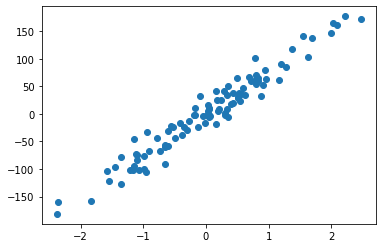

In [3]:
# create data
X, y= datasets.make_regression(n_samples=100, n_features=1, noise= 20, random_state=4)
x= X.reshape((100,))
x= np.array([x,y]).T
print(x.shape)
plt.scatter(x[:,0], x[:,1])

In [4]:
# perform dimensionality reduction with pca
pca= PCA(1)
pca.fit(x)
x_projection= pca.transform(x)

In [5]:
x_projection.shape

(100, 1)

In [6]:
# get eign vector line 
def eigen_vector_plot():
  eigen_vector= pca.n_eigen_vectors_retreval()
  g= np.array([[0, 0], [eigen_vector[0,0], eigen_vector[0, 1]]])

  lis=[]
  m= (g[1,1]-g[0,1])/(g[1, 0]-g[0, 0])
  for i in range(-3, 4):
    point= np.array([i, m*i])
    lis.append(point)
  arr = np.asarray(lis)
  return arr,m

eigen_vector_line, m= eigen_vector_plot()

In [7]:
# get x and y values for projections
def projection_xny(x_projection, m):
  lis_of_xny=[]
  theta= np.arctan(m)
  cos_theta= np.cos(theta)
  for point in x_projection:
    x_length= point * cos_theta
    y_length= m * x_length
    ex= np.array([x_length, y_length])
    lis_of_xny.append(ex)
  arr= np.asarray(lis_of_xny)
  arr= arr.reshape((100,2))
  return arr

projections_xny= projection_xny(x_projection, m)


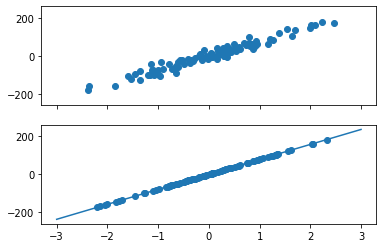

In [8]:
# plot 
fig, ax =plt.subplots(2,1, sharey= True, sharex= True)
ax[0].scatter(x[:,0], x[:,1])

ax[1].plot(eigen_vector_line[:,0], eigen_vector_line[:,1])
ax[1].scatter(projections_xny[:,0], projections_xny[:,1])